In [249]:
# importing all required packages & notebook extensions at the start of the notebook
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter
import matplotlib.patches as mpatches
from scipy.stats import shapiro

or_dir = '../data' #original data (demux sequences, metadata)
data_dir = 'data' #data from polybox (ASV, taxonomy analysis)


# Getting data from polybox

In [6]:
! wget -nv -O data.zip 'https://polybox.ethz.ch/index.php/s/pNA39R0rl2xMMj9/download'
! unzip -q data.zip #-d $data_dir
! mv data data2
! mv data2/taxonomy/data .
! cp data2/ASV/data/* data
! cp data2/Phylogeny/data/* data
! rm -r data2
! rm data.zip

2022-10-26 08:48:52 URL:https://polybox.ethz.ch/index.php/s/pNA39R0rl2xMMj9/download [903126257] -> "data.zip" [1]


In [7]:
! pwd

/home/jovyan/HelicopterBaby/Phylogeny, alpha and beta diversity


# Running the standard alpha diversity analysis

Q: should we use filtered table or not???

In [14]:
! qiime feature-table summarize \
  --i-table $data_dir/phylogeny_filtered_table.qza \
  --m-sample-metadata-file $or_dir/metadata.tsv \
  --o-visualization $data_dir/feature-table.qzv

Saved Visualization to: data/feature-table.qzv


In [250]:
Visualization.load(f'{data_dir}/feature-table.qzv')

<visualization: Visualization uuid: ea4a5b3d-ce51-467a-b22c-a70aa14138f1>

In [12]:
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/phylogeny_filtered_table.qza \
    --i-phylogeny $data_dir/reference-tree.qza \
    --p-max-depth 10000 \
    --m-metadata-file $or_dir/metadata.tsv \
    --o-visualization $data_dir/alpha-rarefaction.qzv

Saved Visualization to: data/alpha-rarefaction.qzv


DOES 10k max depth make sense????

In [251]:
Visualization.load(f'{data_dir}/alpha-rarefaction.qzv')

<visualization: Visualization uuid: e043bd7e-1459-4b96-a22d-fa9570c70065>

In [ ]:
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/phylogeny_filtered_table.qza \
  --i-phylogeny $data_dir/reference-tree.qza \
  --m-metadata-file $or_dir/metadata.tsv \
  --p-sampling-depth 8000 \
  --output-dir $data_dir/core-metrics-results

In [7]:
! pwd

/home/jovyan/HelicopterBaby/Phylogeny, alpha and beta diversity


In [252]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $or_dir/metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance.qzv

Saved Visualization to: data/core-metrics-results/faith-pd-group-significance.qzv


In [ ]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance.qzv')

In [ ]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $or_dir/metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance-numeric.qzv

In [247]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: 72958585-15a2-42cd-a29c-4fc7adcd36b3>

# Alpha diversity and metadata



In [235]:
metadata = pd.read_csv(or_dir + '/metadata.tsv', sep = '\t')
alpha_diversities = pd.read_csv(data_dir + '/metadata_correlation.tsv', sep = '\t')
alpha_diversities = alpha_diversities.iloc[1:,:]

# check if indices match
m_ind = set(metadata.index)
a_ind = set(alpha_diversities.index)
diff = m_ind ^ a_ind
print(diff)

# set id as index
metadata = metadata.set_index('id')
alpha_diversities = alpha_diversities.set_index('id')
#metadata.drop(diff)
alpha_meta = pd.concat([metadata, alpha_diversities], axis =1, join = 'inner')
alpha_meta = alpha_meta.T.drop_duplicates().T

# prints to check
print(alpha_diversities['faith_pd'].isna().sum())
print(alpha_meta.columns)
print(metadata.shape)
print(alpha_diversities.shape)
print(alpha_meta.shape)
print(metadata.index[-1])
#print(metadata.index == alpha_diversities.index)
#print(alpha_diversities['WAZ'] == metadata['WAZ'])
print(alpha_diversities.head())
print(metadata.head())
print(alpha_meta.head())

{0}
0
Index(['Library Layout', 'Instrument', 'collection_date', 'geo_location_name',
       'geo_latitude', 'geo_longitude', 'host_id', 'age_days', 'weight_kg',
       'length_cm', 'WAZ', 'HAZ', 'WHZ', 'BMI', 'birth_weight_g',
       'birth_length_cm', 'sex', 'delivery_mode', 'zygosity', 'race',
       'ethnicity', 'delivery_preterm', 'diet_milk', 'diet_weaning',
       'age_months', 'geo_latitude', 'geo_longitude', 'host_id', 'age_days',
       'weight_kg', 'length_cm', 'WAZ', 'HAZ', 'WHZ', 'BMI', 'birth_weight_g',
       'birth_length_cm', 'age_months', 'faith_pd'],
      dtype='object')
(1669, 25)
(1668, 14)
(1668, 39)
ERR1310706
           geo_latitude geo_longitude host_id age_days weight_kg length_cm  \
id                                                                           
ERR1314182     38.63699    -90.263794    42.1      232       NaN       NaN   
ERR1314183     38.63699    -90.263794    27.2      192       NaN       NaN   
ERR1314184     38.63699    -90.263794    28.1  

In [203]:
diff


{0}

## Weaning

In [127]:
id_weaning = metadata[metadata['diet_weaning'] == True]['id']
print(id_weaning.shape)
id_not_weaning = metadata[metadata['diet_weaning'] == False]['id']
print(id_not_weaning.shape)
unassigned_weaning = metadata['diet_weaning'].isna().sum()
print('Percentage of unassigned to weaning data = ' + str(unassigned_weaning/metadata.shape[0]*100))
print(unassigned_weaning)

           id Library Layout      Instrument      collection_date  \
0  ERR1314182         PAIRED  Illumina MiSeq  2011-11-11 00:00:00   
1  ERR1314183         PAIRED  Illumina MiSeq  2010-12-11 00:00:00   
2  ERR1314184         PAIRED  Illumina MiSeq  2011-12-11 00:00:00   
3  ERR1314185         PAIRED  Illumina MiSeq  2011-12-11 00:00:00   
4  ERR1314186         PAIRED  Illumina MiSeq  2013-01-12 00:00:00   

          geo_location_name  geo_latitude  geo_longitude  host_id  age_days  \
0  USA, Missouri, St. Louis      38.63699     -90.263794     42.1     232.0   
1  USA, Missouri, St. Louis      38.63699     -90.263794     27.2     192.0   
2  USA, Missouri, St. Louis      38.63699     -90.263794     28.1     536.0   
3  USA, Missouri, St. Louis      38.63699     -90.263794     28.2     537.0   
4  USA, Missouri, St. Louis      38.63699     -90.263794     39.2     688.0   

   weight_kg  ...  birth_length_cm     sex  delivery_mode     zygosity  \
0        NaN  ...             47.0  

### Scatter plot of alpha diversity vs age with weaning coloured and hist of alpha diversity vs weaning

[ShapiroResult(statistic=0.9389684796333313, pvalue=1.7363629929495125e-14), ShapiroResult(statistic=0.810336709022522, pvalue=8.272047191107065e-14), ShapiroResult(statistic=0.9611707925796509, pvalue=5.708179171985727e-15)]


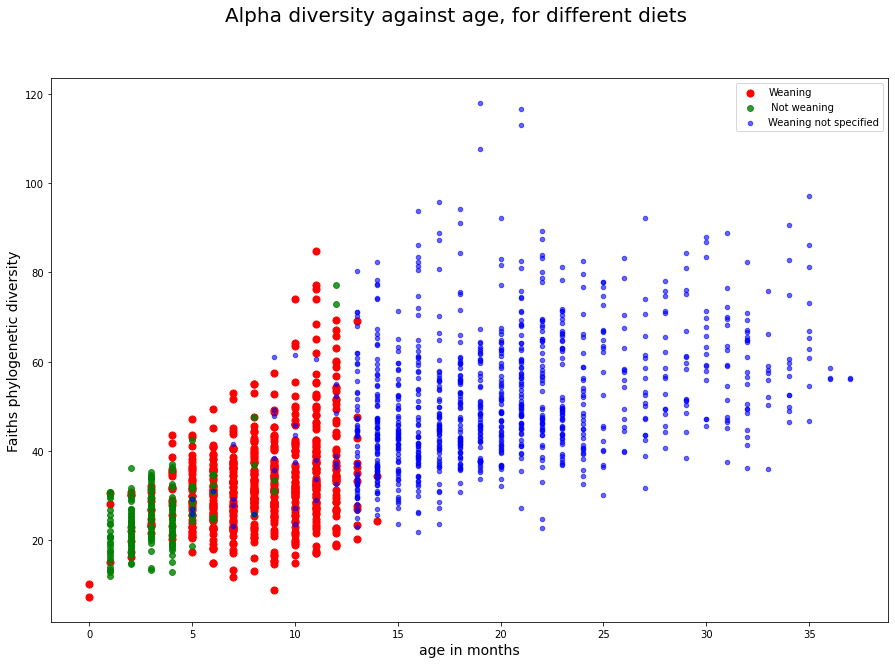

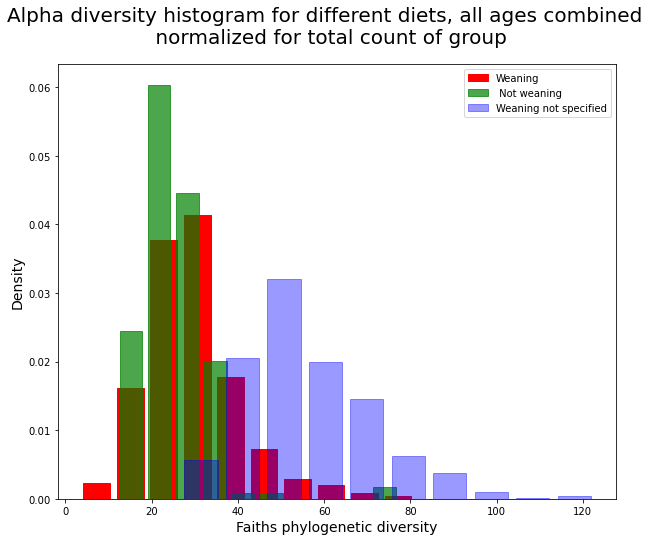

In [243]:
# map weaning to colours 
colours_weaning = {True:'red', False:'green', 'na':'blue'}#, 'other':'black'}

# plot the alpha diversity against age, for different weaning status = different colour
fig, ax = plt.subplots(figsize = (15,10))
fig2, ax2 = plt.subplots(figsize=(10,8))
weaning_options = [True, False]
labels = ['Weaning', ' Not weaning', 'Weaning not specified']
shapiro_weaning = list()
i=0
for key in colours_weaning:
    if type(key) != str:
        subs = alpha_diversities.loc[metadata['diet_weaning'] == weaning_options[i], ]
    else:
        subs = alpha_diversities.loc[metadata['diet_weaning'].isna(), ]
    ax.scatter(subs['age_months'].astype(int), subs['faith_pd'].astype(float), 
               color = colours_weaning[key], s = 50-i*15, label = labels[i],
              zorder = i, alpha = 1-i*0.2)
    ax2.hist(subs['faith_pd'].astype(float), 
               color = colours_weaning[key], label = labels[i], rwidth = 0.8,
              align = aligns[i], density = True, alpha = 1-i*0.3, edgecolor = colours_weaning[key])
    shapiro_weaning.append(shapiro(subs['faith_pd'].astype(float)))
    i = i+1
ax.legend()
ax.set_xlabel('age in months',  fontsize = 14)
ax.set_ylabel('Faiths phylogenetic diversity',  fontsize = 14)
fig.suptitle('Alpha diversity against age, for different diets',  fontsize = 20)

ax2.legend()
ax2.set_xlabel('Faiths phylogenetic diversity',  fontsize = 14)
ax2.set_ylabel('Density',  fontsize = 14)
fig2.suptitle('Alpha diversity histogram for different diets, all ages combined \n normalized for total count of group',  fontsize = 20)

print(shapiro_weaning)
print('the shapiro test shows that our data is not normally distributed')

## Breast or formula milk

fd
bd
no milk
False
[ShapiroResult(statistic=0.919058084487915, pvalue=3.2786600597739735e-17), ShapiroResult(statistic=0.9868997931480408, pvalue=0.2802742123603821), ShapiroResult(statistic=0.9522532820701599, pvalue=0.19419588148593903), ShapiroResult(statistic=0.9611707925796509, pvalue=5.708179171985727e-15)]
the shapiro test shows that our data is not normally distributed for the breast milk and no milk


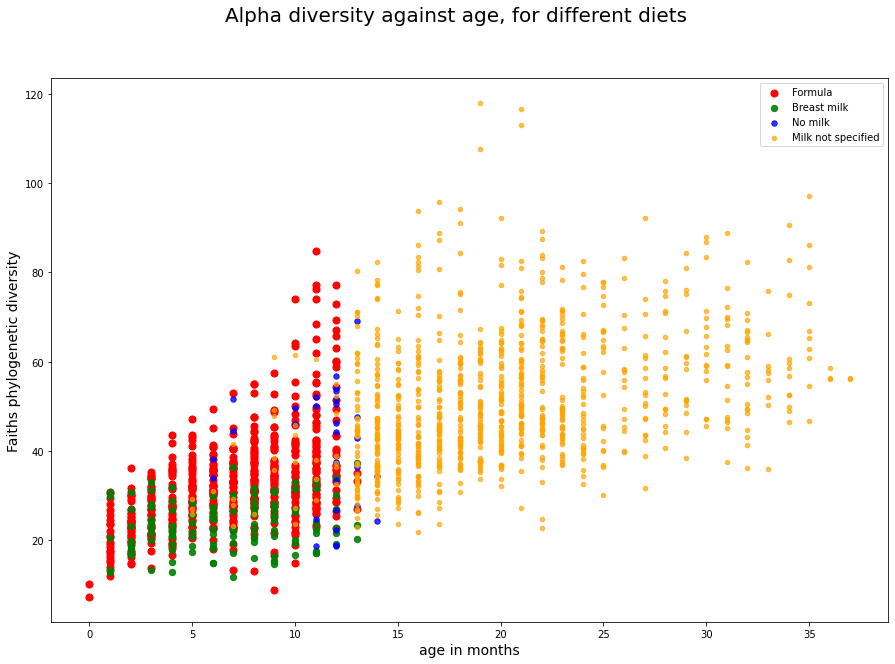

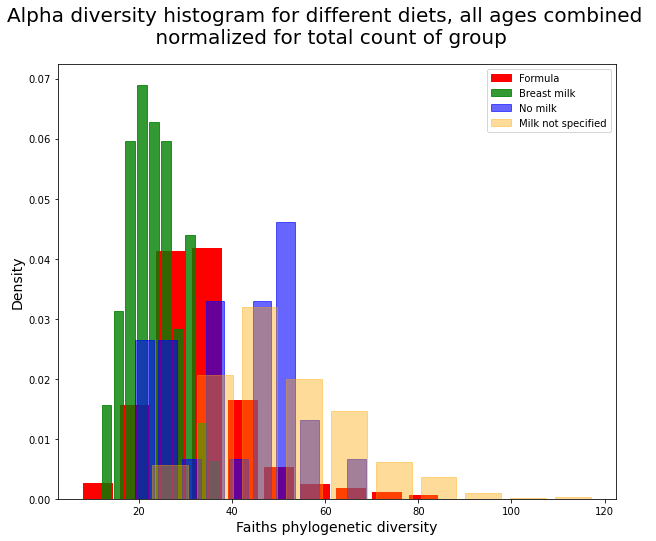

In [246]:
# map weaning to colours 
formula_breast = metadata_ordered['diet_milk'].fillna('na')
color_formula_breast = {'fd': 'red', 'bd': 'green', 'no milk': 'blue', False: 'orange'}

# plot the alpha diversity against age, for different weaning status = different colour
fig, ax = plt.subplots(figsize = (15,10))
fig2, ax2 = plt.subplots(figsize=(10,8))
labels = ['Formula', 'Breast milk', 'No milk', 'Milk not specified']
diet_milk_options = ['fd','bd', 'no milk']
shapiro_milk = list()

i=0
for key in color_formula_breast:
    print(key)
    if type(key) == str:
        subs = alpha_diversities.loc[metadata['diet_milk'] == key, ]
    else:
        subs = alpha_diversities.loc[metadata['diet_milk'].isna(), ]
    ax.scatter(subs['age_months'].astype(int), subs['faith_pd'].astype(float), 
               color = color_formula_breast[key], s = 50-i*10, label = labels[i],
              zorder = i, alpha = 1-i*0.1)
    ax2.hist(subs['faith_pd'].astype(float), 
               color = color_formula_breast[key], label = labels[i], rwidth = 0.8,
               density = True, alpha = 1-i*0.2, edgecolor = color_formula_breast[key]) #align = aligns[i],
    i = i+1
    shapiro_milk.append(shapiro(subs['faith_pd'].astype(float)))
    #if i == 1:
    #        break
ax.legend()
ax.set_xlabel('age in months',  fontsize = 14)
ax.set_ylabel('Faiths phylogenetic diversity',  fontsize = 14)
fig.suptitle('Alpha diversity against age, for different diets',  fontsize = 20)

ax2.legend()
ax2.set_xlabel('Faiths phylogenetic diversity',  fontsize = 14)
ax2.set_ylabel('Density',  fontsize = 14)
fig2.suptitle('Alpha diversity histogram for different diets, all ages combined \n normalized for total count of group',  fontsize = 20)

print(shapiro_milk)
print('the shapiro test shows that our data is not normally distributed for the formula milk and milk not specified')

## Check for normality

In [ ]:
# Shapiro Wilk Test
from scipy.stats import shapiro



### Somehow combine weaning and milk type? even useful?

TypeError: 'Series' objects are mutable, thus they cannot be hashed

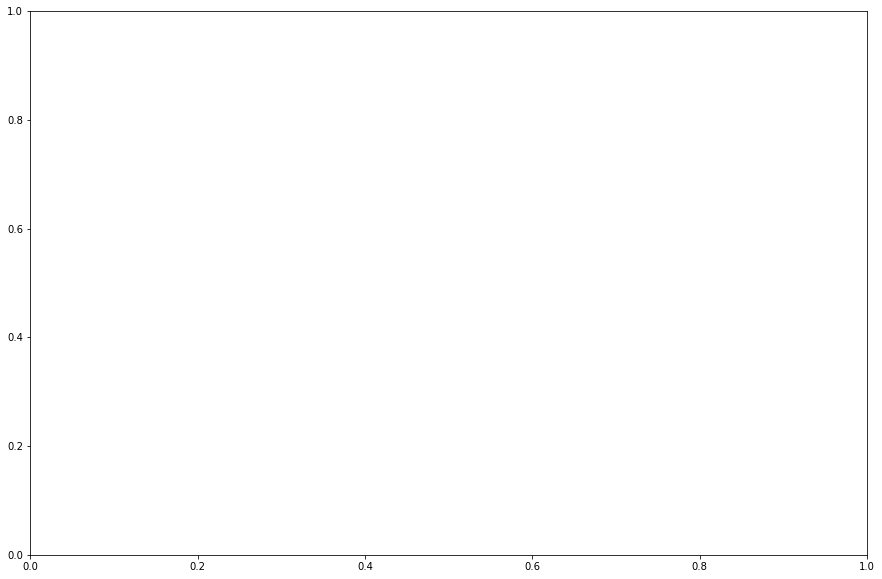

In [125]:
from matplotlib.legend_handler import HandlerPatch

# sort by the id found in the alpha_diversity and set id as index
metadata_ordered = metadata.set_index('id')
metadata_ordered = metadata_ordered.loc[alpha_diversities['id'], ]
alpha_div_ordered = alpha_diversities.set_index('id')

# map weaning to colours 
colours_weaning = {True:'red', False:'green', 'na':'blue'}#, 'other':'black'}

formula_breast = metadata_ordered['diet_milk'].fillna('na')
marker_formula_breast = {'bd': 'o', 'fd': 'x', False: '*', 'no milk': 'v'}

# plot the alpha diversity against age, for different weaning status = different colour
fig, ax = plt.subplots(figsize = (15,10))
weaning_options = [True, False]
diet_milk_options = ['fd','bd']
labels = ['Weaning and', ' Not weaning', 'Weaning not specified']
i=0
#for mark_key in marker_formula_breast:
for key in colours_weaning:
    if type(key) != str:
        subs = alpha_div_ordered[metadata_ordered['diet_weaning'] == weaning_options[i] ]
        subs_milk = formula_breast[metadata_ordered['diet_weaning'] == weaning_options[i] ]
    else:
        subs = alpha_div_ordered[metadata_ordered['diet_weaning'].isna() ]
        subs_milk = formula_breast[metadata_ordered['diet_weaning'].isna() ]
    ax.scatter(subs['age_months'].astype(int), subs['faith_pd'].astype(float), 
               color = colours_weaning[key], s = 50-i*15, label = labels[i],
              zorder = i, alpha = 1-i*0.2, marker = subs_milk.map(lambda x: marker_formula_breast[x]))
    i = i+1
ax.legend()
ax.set_xlabel('age in months')
ax.set_ylabel('Faiths phylogenetic diversity')
fig.suptitle('Alpha diversity against age, for different diets')

In [126]:
subs_milk.map(lambda x: marker_formula_breast[x])

id
ERR1314182    x
ERR1314183    x
ERR1314187    v
ERR1314188    v
ERR1314190    x
             ..
ERR1310696    x
ERR1310701    x
ERR1310702    x
ERR1310707    x
ERR1310708    x
Name: diet_milk, Length: 567, dtype: object